USING DATA ANALYSIS TO GENERATE INSIGHTS FOR MICROSOFT

BUSINESS PROBLEM


The business challenge at hand is Microsoft's aspiration to enter the realm of original video creation. To achieve this, Microsoft recognizes the significance of harnessing the power of data analysis techniques to extract valuable insights and make well-informed strategic decisions. By leveraging data, Microsoft aims to gain a deeper understanding of the video content landscape and effectively navigate the complexities of the industry.

Problem Statement

The problem at hand is that Microsoft aims to venture into original video creation and recognizes the importance of utilizing data analysis techniques to drive informed strategic decision-making. However, there is a lack of comprehensive understanding of the video content landscape and the complexities associated with the industry. This poses a challenge in effectively navigating the market, identifying opportunities, and developing a successful video content creation strategy. Therefore, there is a need to leverage data analysis to extract valuable insights that can address these challenges and guide Microsoft in entering and thriving in the competitive world of original video creation.

Defining the Metric for Success

a) Production Infrastructure

I will investigate the effectiveness of studios' production infrastructures in handling large-scale productions, managing multiple projects, coordinating production crews, streamlining post-production workflows, and embarking on diverse and ambitious film ventures.

b) Budget Efficiency 

Here, the success metric focuses on evaluating the efficiency of budget allocation in movie projects. I will be analyzing the relationship between the production budget, budget distribution, and the overall success of the movies in terms of profits, considering factors such as box office revenue.

c) Industry Recognition and Partnerships

I will investigate the achievement of industry recognition and the establishment of strategic partnerships within the video content creation space. This can be measured by awards, collaborations, and partnerships with renowned content creators, studios in relation to the production budget.

Understanding the Context

In my Microsoft project, I am working towards specific objectives that aim to drive strategic decision-making in the realm of original video creation. The primary focus is on utilizing data analysis techniques to gain a comprehensive understanding of the video content landscape and the complexities associated with the industry. By leveraging data, I aim to extract valuable insights that can inform our strategies in entering and thriving in the competitive world of original video creation. Through this project, I seek to identify the production infrastructure, budget efficiency, industry recognition and strategic partnerships. The ultimate goal is to develop a successful video content creation strategy that sets Microsoft apart in the market.

DATA RELEVANCE


The data used in this project was retrieved from:
 https://www.themoviedb.org/
 https://www.boxofficemojo.com/
 https://www.imdb.com/
 https://www.rottentomatoes.com/
 https://www.the-numbers.com/

The files I used are both Comma Separated Value (CSV) files

i) movie_gross.csv
This file provides valuable insights and information to improve original video content. By analyzing the movie gross file, I can identify movies that have achieved significant box office success depending on production budgets. This information helps us understand the revenue potential of original video content and identify strategies to maximize returns on investments.

ii)movie_budgets.csv
The movie budget file contains data on the production budgets of different movies. By analyzing this data, I am able to gain insights into how budgets are allocated across various components of the production process, such as script development, talent acquisition, production design, visual effects, marketing, and distribution. This information can help us understand the relevance of industry recognition and strategic partnerships.
 

DATA UNDERSTANDING


I will commence the analysis by examining the provided data sets encompassing industry players, industry recognition, strategic partnerships, and production budgets. My initial focus will be on ensuring the data's cleanliness, consistency, and suitability for analysis. Once prepared, I will proceed to calculate descriptive statistics for the pertinent variables and generate insightful visualizations based on the derived variables. Additionally, I will conduct extensive research on the benefits associated with industry recognition and the establishment of strategic partnerships. Incorporating this acquired knowledge, I will enrich my analysis and provide a comprehensive understanding of the advantages and impacts of industry recognition and strategic alliances. Furthermore, I will delve into the distribution of production budgets within the dataset, conducting a thorough budget analysis. This will involve calculating summary statistics such as the mean, median, and standard deviation of the budgets and visualizing the budget distribution using histograms or box plots. Lastly, I will meticulously interpret the findings obtained through data exploration and analysis, extracting key insights and trends related to the performance of industry players, the benefits of industry recognition and strategic partnerships, as well as the distribution of production budgets. These insights will serve as the foundation for addressing the specific questions at hand and formulating actionable recommendations and strategies based on the available data.


In [676]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [677]:
df_gross = pd.read_csv('Data\movies_gross.csv')
df_budgets = pd.read_csv('Data\movie_budgets.csv')

In [678]:
#investigate the data shape

df_gross.shape

(3387, 5)

In [679]:
#investigate the data shape
df_budgets.shape

(5782, 6)

In [680]:
#investigate the data types 
df_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [681]:
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [682]:
df_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [683]:
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [684]:
df_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [685]:
df_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [686]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [687]:
df_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


Extract Transform Load - ETL 

In [688]:
#Data integration, my list of df
list_of_dataframes = [df_budgets, df_gross ]
df = pd.concat(list_of_dataframes)

In [689]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,title,studio,foreign_gross,year
0,1.0,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN
1,2.0,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN,NaN,NaN
2,3.0,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN,NaN,NaN
3,4.0,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN,NaN,NaN
4,5.0,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN


In [690]:
df.shape

(9169, 10)

In [691]:
df.describe()

,id,year
count,5782.000000,3387.000000
mean,50.372363,2013.958075
std,28.821076,2.478141
min,1.000000,2010.000000
25%,25.000000,2012.000000
50%,50.000000,2014.000000
75%,75.000000,2016.000000
max,100.000000,2018.000000


In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9169 entries, 0 to 3386
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   float64
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross     9141 non-null   object 
 5   worldwide_gross    5782 non-null   object 
 6   title              3387 non-null   object 
 7   studio             3382 non-null   object 
 8   foreign_gross      2037 non-null   object 
 9   year               3387 non-null   float64
dtypes: float64(2), object(8)
memory usage: 788.0+ KB


In [693]:
df.dtypes

id                   float64
release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
title                 object
studio                object
foreign_gross         object
year                 float64
dtype: object

In [694]:
# i used the drop fun to remove my id, title, foreign gross and release date columns 
df.drop(['id', 'release_date', 'title', 'foreign_gross' ], axis=1, inplace=True)

In [695]:
df.head()

,movie,production_budget,domestic_gross,worldwide_gross,studio,year
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN


In [696]:
df.shape

(9169, 6)

In [697]:
#checking for duplicates 
df.duplicated().value_counts()

False    9138
True       31
Name: count, dtype: int64

In [698]:
#use keep = false to keep all duplicates and sort_values to put duplicates next to each other
df[df.duplicated(keep=False)].sort_values(by='movie')

,movie,production_budget,domestic_gross,worldwide_gross,studio,year
126,NaN,NaN,3200000.0,NaN,SPC,2010.0
145,NaN,NaN,3200000.0,NaN,SPC,2010.0
162,NaN,NaN,1100000.0,NaN,SPC,2010.0
197,NaN,NaN,1100000.0,NaN,SPC,2010.0
506,NaN,NaN,1300000.0,NaN,FoxS,2011.0
515,NaN,NaN,1400000.0,NaN,LGF,2011.0
580,NaN,NaN,1300000.0,NaN,FoxS,2011.0
586,NaN,NaN,1400000.0,NaN,LGF,2011.0
588,NaN,NaN,1100000.0,NaN,Gold.,2011.0
593,NaN,NaN,1100000.0,NaN,Gold.,2011.0


In [699]:
#remove duplicates
df = df.drop_duplicates()
df.shape
# this was (9169, 6)

(9138, 6)

DATA PREPARATION

The initial step is to ensure the cleanliness, consistency, and analysis readiness of the data. This involves addressing any missing values, misspelled text data, outliers, imbalanced data, and invalid data. Furthermore, I will thoroughly examine the data for any inconsistencies or discrepancies, resolving them through appropriate data transformation or cleaning methods. If required, I will also consider converting data types to their appropriate formats for accurate analysis. Additionally, I will create new variables that can provide further insights and enhance my analytical capabilities.

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9138 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5782 non-null   object 
 1   production_budget  5782 non-null   object 
 2   domestic_gross     9111 non-null   object 
 3   worldwide_gross    5782 non-null   object 
 4   studio             3351 non-null   object 
 5   year               3356 non-null   float64
dtypes: float64(1), object(5)
memory usage: 499.7+ KB


In [701]:
df.dtypes

movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
studio                object
year                 float64
dtype: object

In [702]:
def text_filter(column1: df['production_budget'], column2: df['domestic_gross'], column3: df['worldwide_gross']) -> pd.DataFrame:
    """ Remove extra characters from text in three columns """
    df = pd.DataFrame({'Column1': df['production_budget'] , 'Column2': ['domestic_gross'], 'Column3': ['worldwide_gross']})

    # Apply replacements to each column
    df['Column1'] = df['Column1'].str.replace("$", "").replace(",", "")
    df['Column2'] = df['Column2'].replace("$", "").replace(",", "")
    df['Column3'] = df['Column3'].replace('$', "").replace(',', "").replace('.', "").replace('e', "")

    return df

In [703]:
df.head(20)

,movie,production_budget,domestic_gross,worldwide_gross,studio,year
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",NaN,NaN
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",NaN,NaN
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",NaN,NaN
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN
5,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",NaN,NaN
6,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",NaN,NaN
7,Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",NaN,NaN
8,Justice League,"$300,000,000","$229,024,295","$655,945,209",NaN,NaN
9,Spectre,"$300,000,000","$200,074,175","$879,620,923",NaN,NaN


In [704]:
#check for missing values in this column studio
df['studio'].isna().sum()

5787

In [705]:
#drop missing values in studio column
df['studio'].dropna()

0               BV
1               BV
2               WB
3               WB
4             P/DW
           ...    
3382         Magn.
3383            FM
3384          Sony
3385    Synergetic
3386         Grav.
Name: studio, Length: 3351, dtype: object

In [706]:
df.dtypes


movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
studio                object
year                 float64
dtype: object

In [707]:
# Group by 'studio' and 'year' columns and count the occurrences
grouped = df.groupby(['studio', 'year']).size().reset_index(name='count')

# Sort by the top 5 value counts in 'studio' column
top_studios = grouped['studio'].value_counts().nlargest(5).index
grouped_sorted = grouped[grouped['studio'].isin(top_studios)]

# Sort by 'year' column and combine values with the same year
grouped_sorted = grouped_sorted.sort_values('year').groupby('year').agg({'studio': ', '.join, 'count': sum}).reset_index()

print(grouped_sorted)

     year                      studio  count
0  2010.0  BV, SGem, WB, IFC, WB (NL)     67
1  2011.0  SGem, WB, IFC, BV, WB (NL)     74
2  2012.0  WB (NL), SGem, IFC, WB, BV     55
3  2013.0  WB (NL), IFC, WB, BV, SGem     46
4  2014.0  WB, WB (NL), SGem, BV, IFC     58
5  2015.0  SGem, WB (NL), BV, WB, IFC     57
6  2016.0  WB (NL), BV, WB, SGem, IFC     52
7  2017.0  WB (NL), WB, BV, IFC, SGem     37
8  2018.0  WB, BV, IFC, SGem, WB (NL)     44


In [708]:
#remove commas from object column 
df['production_budget'] = df['production_budget'].str.replace(',', '')
df['production_budget'] = df['production_budget'].str.replace('$', '')
print(df['production_budget'])

0       425000000 
1       410600000 
2       350000000 
3       330600000 
4       317000000 
           ...    
3382           NaN
3383           NaN
3384           NaN
3385           NaN
3386           NaN
Name: production_budget, Length: 9138, dtype: object


In [709]:
#i want to create a pivot table using grouped sorted  
# Calculate the top studios
top_studios = grouped_sorted['studio'].value_counts().nlargest(5).index

# Filter the grouped_sorted DataFrame for top studios
filtered_grouped_sorted = grouped_sorted[grouped_sorted['studio'].isin(top_studios)]

# Create a pivot table with top studios as columns
pivot_table = filtered_grouped_sorted.pivot_table(index='year', columns='studio', values='count', aggfunc='sum')
print(pivot_table)

studio  BV, SGem, WB, IFC, WB (NL)  SGem, WB, IFC, BV, WB (NL)   
year                                                             
2010.0                        67.0                         NaN  \
2011.0                         NaN                        74.0   
2012.0                         NaN                         NaN   
2013.0                         NaN                         NaN   
2014.0                         NaN                         NaN   

studio  WB (NL), IFC, WB, BV, SGem  WB (NL), SGem, IFC, WB, BV   
year                                                             
2010.0                         NaN                         NaN  \
2011.0                         NaN                         NaN   
2012.0                         NaN                        55.0   
2013.0                        46.0                         NaN   
2014.0                         NaN                         NaN   

studio  WB, WB (NL), SGem, BV, IFC  
year                                


In [710]:
unstacked_pivot_table = pivot_table.unstack()
print(unstacked_pivot_table)


studio                      year  
BV, SGem, WB, IFC, WB (NL)  2010.0    67.0
                            2011.0     NaN
                            2012.0     NaN
                            2013.0     NaN
                            2014.0     NaN
SGem, WB, IFC, BV, WB (NL)  2010.0     NaN
                            2011.0    74.0
                            2012.0     NaN
                            2013.0     NaN
                            2014.0     NaN
WB (NL), IFC, WB, BV, SGem  2010.0     NaN
                            2011.0     NaN
                            2012.0     NaN
                            2013.0    46.0
                            2014.0     NaN
WB (NL), SGem, IFC, WB, BV  2010.0     NaN
                            2011.0     NaN
                            2012.0    55.0
                            2013.0     NaN
                            2014.0     NaN
WB, WB (NL), SGem, BV, IFC  2010.0     NaN
                            2011.0     NaN
                   

In [711]:
df.head(5)

,movie,production_budget,domestic_gross,worldwide_gross,studio,year
0,Avatar,425000000,"$760,507,625","$2,776,345,279",NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875",NaN,NaN
2,Dark Phoenix,350000000,"$42,762,350","$149,762,350",NaN,NaN
3,Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963",NaN,NaN
4,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747",NaN,NaN


In [712]:
#i want to get a new column 
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '')
df['domestic_gross'] = df['domestic_gross'].str.replace('.', '')


In [713]:
# turn my string to numeric  
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'], errors='coerce')
df['production_budget'] = pd.to_numeric(df['production_budget'], errors='coerce')

#get the difference 
df['difference'] = df['domestic_gross'] - df['production_budget'] 

#select only the top 10 result
top_10 = df.nlargest(10, 'difference')

In [714]:
top_10

,movie,production_budget,domestic_gross,worldwide_gross,studio,year,difference
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,"$2,053,311,220",NaN,NaN,630662225.0
41,Black Panther,200000000.0,700059566.0,"$1,348,258,224",NaN,NaN,500059566.0
42,Titanic,200000000.0,659363944.0,"$2,208,208,395",NaN,NaN,459363944.0
3464,Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,"$786,598,007",NaN,NaN,449998007.0
33,Jurassic World,215000000.0,652270625.0,"$1,648,854,864",NaN,NaN,437270625.0
3525,ET: The Extra-Terrestrial,10500000.0,435110554.0,"$792,965,326",NaN,NaN,424610554.0
43,Incredibles 2,200000000.0,608581744.0,"$1,242,520,711",NaN,NaN,408581744.0
26,The Avengers,225000000.0,623279547.0,"$1,517,935,897",NaN,NaN,398279547.0
6,Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",NaN,NaN,378815482.0
692,Shrek 2,70000000.0,441226247.0,"$937,008,132",NaN,NaN,371226247.0


In [715]:
top_10.columns

Index(['movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
       'studio', 'year', 'difference'],
      dtype='object')

DATA ANALYSIS AND VISUALIZATION 

1. Financial Feasibility

 Here, I want to calculate the potential return on investment by comparing the projected revenue against the estimated production. Based on my analysis, I discovered a positive correlation between the production budget of a movie and its resulting profits. The data suggests that investing more in the production budget tends to yield better financial outcomes. 

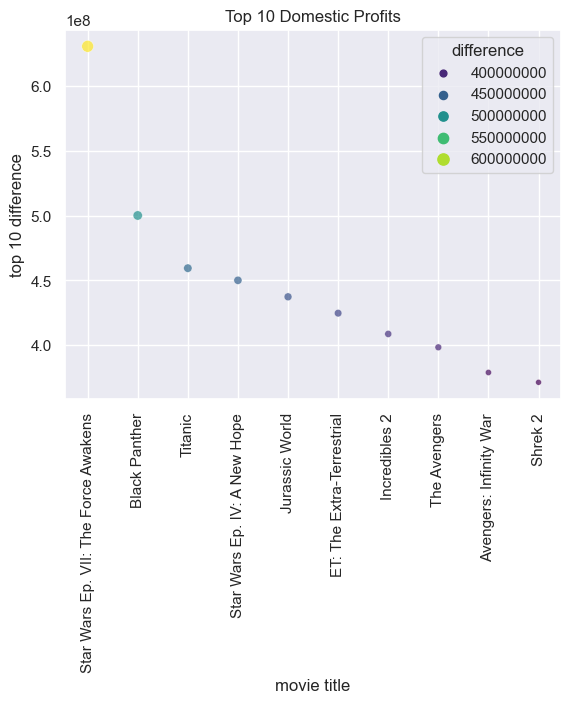

In [716]:
sns.scatterplot(data=top_10, x='movie', y=top_10['difference'], size='difference', hue='difference', palette='viridis', alpha=0.7)


plt.xlabel('movie title')
plt.ylabel('top 10 difference')
plt.title('Top 10 Domestic Profits')

plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show();

2) Correlation Analysis

A correlation coefficient of -0.79 suggests a strong negative correlation between the 'count' and 'year' variables in the given dataset. The negative sign indicates that as the value of one variable 'year' increases, the value of the other variable 'count' tends to decrease. In my analysis, this correlation implies that over the years, there has been a decreasing trend in the counts of movies produced by the top studios. As the years progress, the counts of movies produced by the top studios tend to decrease. It's important to note that correlation does not imply causation, and further analysis is required to understand the underlying factors influencing this negative correlation. 

In [717]:
# stripping the decimal point from year column
# Convert 'year' column to string
df['year'] = df['year'].astype(str)

# Remove decimal point and figures after it using index function
df['year'] = df['year'].apply(lambda x: x.split('.')[0] if '.' in x else x)

# Convert 'year' column to integers, handling missing values
df['year'] = df['year'].replace('', float('nan')).astype(float).astype('Int64')

# Verify the updated 'year' column
print(df['year'])

0       <NA>
1       <NA>
2       <NA>
3       <NA>
4       <NA>
        ... 
3382    2018
3383    2018
3384    2018
3385    2018
3386    2018
Name: year, Length: 9138, dtype: Int64


In [718]:
# Group by 'studio' and 'year' columns and count the occurrences
grouped = df.groupby(['studio', 'year']).size().reset_index(name='count')

# Sort by the top 5 value counts in 'studio' column
top_studios = grouped['studio'].value_counts().nlargest(5).index
grouped_sorted = grouped[grouped['studio'].isin(top_studios)]

# Sort by 'year' column and combine values with the same year
grouped_sorted = grouped_sorted.sort_values('year').groupby('year').agg({'studio': ', '.join, 'count': sum}).reset_index()

print(grouped_sorted)

   year                      studio  count
0  2010  BV, SGem, WB, IFC, WB (NL)     67
1  2011  SGem, WB, IFC, BV, WB (NL)     74
2  2012  WB (NL), SGem, IFC, WB, BV     55
3  2013  WB (NL), IFC, WB, BV, SGem     46
4  2014  WB, WB (NL), SGem, BV, IFC     58
5  2015  SGem, WB (NL), BV, WB, IFC     57
6  2016  WB (NL), BV, WB, SGem, IFC     52
7  2017  WB (NL), WB, BV, IFC, SGem     37
8  2018  WB, BV, IFC, SGem, WB (NL)     44


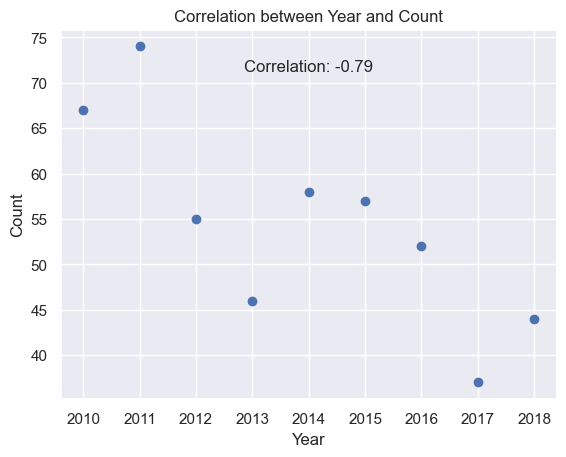

In [719]:
# Calculate the correlation
grouped_sorted['year'] = grouped_sorted['year'].astype(int)

correlation = grouped_sorted['count'].corr(grouped_sorted['year'])

# Plot the correlation
plt.scatter(grouped_sorted['year'], grouped_sorted['count'])
plt.title('Correlation between Year and Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.text(0.5, 0.9, f'Correlation: {correlation:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

3) Production Infrastructure

A robust production infrastructure allows studios to handle large-scale productions with complex logistical requirements. It enables the management of multiple film projects simultaneously, facilitates the coordination of large production crews, and accommodates extensive post-production activities. The ability to handle ambitious projects expands the creative possibilities for studios and positions them to take on diverse and ambitious film ventures.
The top 5 studios in the world right now are IFC, Uni, WB, Fox, Magn and we can infer that these studios are successful because of their infrastructural capacity and marketing and distribution channels. To go a step further I was able to illustrate that Fox studio had the highest figure in movies produced.

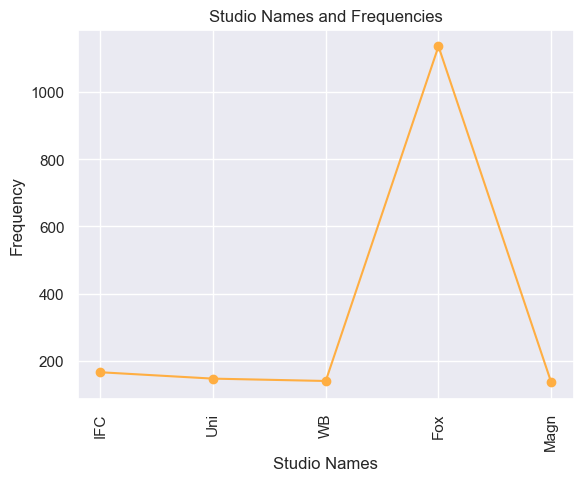

In [720]:
studio_names = ['IFC', 'Uni', 'WB', 'Fox', 'Magn']
frequencies = [166, 147, 140, 1136, 136]
years = range(len(studio_names))

plt.plot(years, frequencies, marker='o', linestyle='-', color='#FFAE42')
plt.xticks(years, studio_names, rotation=90)
plt.xlabel('Studio Names')
plt.ylabel('Frequency')
plt.title('Studio Names and Frequencies')
plt.grid(True)

plt.show()

4) Industry Recognition and Partnerships

In the data analysis subsection of the project, I investigate the advantages of strategic partnerships between renowned studios in the movie industry and other established and previously successful individuals. Specifically, I focus on examining the top 10 highest budgeted movies and highlight how these films benefited from strategic collaborations with industry-recognized producers, writers, actors, directors, and other creative professionals. By analyzing these examples, I aim to shed light on the positive outcomes and potential value generated through such strategic partnerships and high investment on the production budget.

In [721]:
#top 10 producing movies 
df.sort_values('production_budget', ascending=False).head(10)

,movie,production_budget,domestic_gross,worldwide_gross,studio,year,difference
0,Avatar,425000000.0,760507625.0,"$2,776,345,279",NaN,<NA>,335507625.0
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875",NaN,<NA>,-169536125.0
2,Dark Phoenix,350000000.0,42762350.0,"$149,762,350",NaN,<NA>,-307237650.0
3,Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963",NaN,<NA>,128405868.0
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747",NaN,<NA>,303181382.0
5,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,"$2,053,311,220",NaN,<NA>,630662225.0
6,Avengers: Infinity War,300000000.0,678815482.0,"$2,048,134,200",NaN,<NA>,378815482.0
7,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,"$963,420,425",NaN,<NA>,9420425.0
8,Justice League,300000000.0,229024295.0,"$655,945,209",NaN,<NA>,-70975705.0
9,Spectre,300000000.0,200074175.0,"$879,620,923",NaN,<NA>,-99925825.0


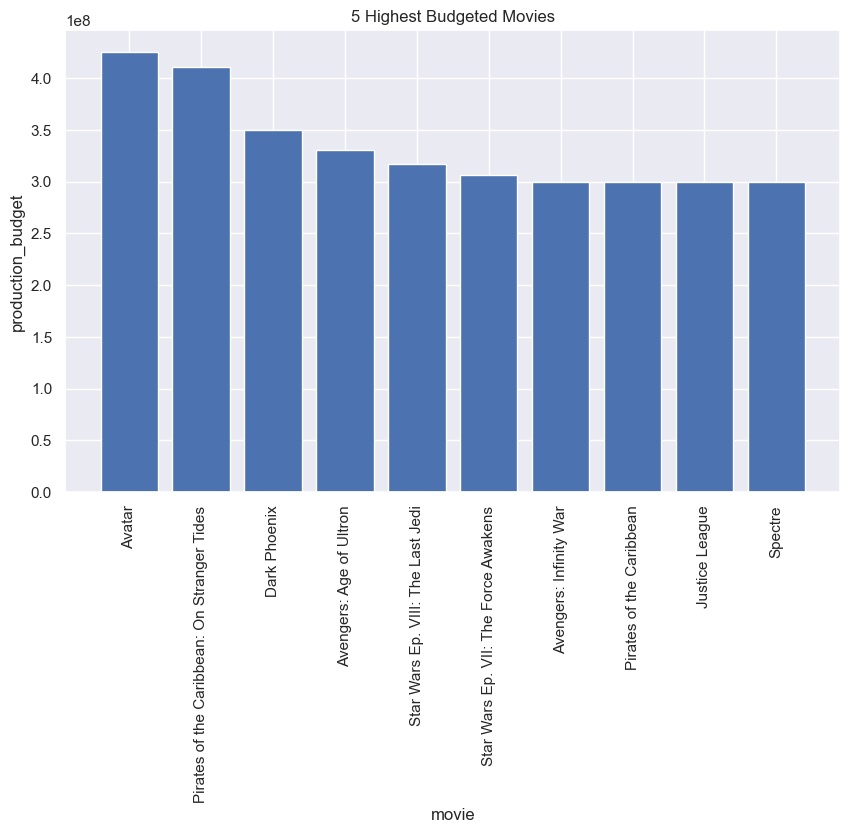

In [722]:
bar_chart_movies = ['Avatar', 'Pirates of the Caribbean: On Stranger Tides', 'Dark Phoenix', 'Avengers: Age of Ultron', 'Star Wars Ep. VIII: The Last Jedi', 'Star Wars Ep. VII: The Force Awakens', 'Avengers: Infinity War', 'Pirates of the Caribbean', 'Justice League', 'Spectre']


bar_chart_title = '5 Highest Budgeted Movies'
bar_chart_count_label = 'production_budget'
bar_chart_series_label = 'movie'


# YOUR CODE HERE
bar_chart_counts = df['production_budget'].nlargest(10)
_figure, ax = plt.subplots(figsize=(10, 6))
ax.bar(bar_chart_movies, bar_chart_counts)
ax.set_title(bar_chart_title)
ax.tick_params(axis="x", labelrotation=90)
ax.set_xlabel(bar_chart_series_label)
ax.set_ylabel(bar_chart_count_label)
plt.show();

CONCLUSION

In conclusion, my analysis has provided valuable insights into various aspects of the movie industry and the factors contributing to success in original video content creation.

Firstly, I conducted a thorough analysis of the potential return on investment by comparing the projected revenue against the estimated production budget. The findings revealed a positive correlation between the production budget and the resulting profits. This suggests that investing more in the production budget tends to lead to better financial outcomes.

Secondly, I explored the importance of a robust production infrastructure for studios. A robust infrastructure enables studios to handle large-scale productions, manage multiple projects simultaneously, coordinate large production crews, and facilitate extensive post-production activities. This infrastructure expands creative possibilities and allows studios to undertake ambitious film ventures.

Furthermore, I examined the top 5 studios in the industry, namely IFC, Uni, WB, Fox, and Magn, and identified their success factors. These studios have demonstrated their success through their infrastructural capacity, marketing strategies, and distribution channels. Notably, the analysis highlighted Fox studio as the highest producer of movies, further illustrating the significance of their production capabilities.

Lastly, I delved into the advantages of strategic partnerships within the movie industry. By analyzing the top 10 highest budgeted movies, I showcased how these films benefited from collaborations with renowned industry professionals, including producers, writers, actors, directors, and other creative individuals. This analysis highlighted the positive outcomes and value generated through such strategic partnerships and emphasized the importance of high investments in the production budget. 

In addition to the insights gained from our data analysis, we also performed a correlation analysis between the count of movies produced by the top studios and the corresponding years. This finding highlights the importance of considering the temporal aspect when analyzing the performance and production trends of movie studios. It suggests that factors such as changing market dynamics, evolving consumer preferences, or strategic decisions made by the studios may have influenced the observed decline in movie production counts.

By incorporating this correlation analysis into my broader analysis of the industry landscape, strategic partnerships, and production budgets, I have gained a more holistic understanding of the challenges and opportunities faced by movie studios in the ever-changing landscape of original video content creation.

Overall, this project has provided a comprehensive understanding of the industry landscape, financial considerations, production infrastructure, and the benefits of strategic collaborations. These insights can guide Microsoft in making informed decisions and developing effective strategies as they venture into original video content creation.